## Tasks
1. EDA
2. Classification

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [2]:
%matplotlib inline

In [3]:
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [4]:
df = pd.read_csv('data/bank-full.csv', sep=';')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
all_cols=list(df.columns)

In [7]:
df.describe(())

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

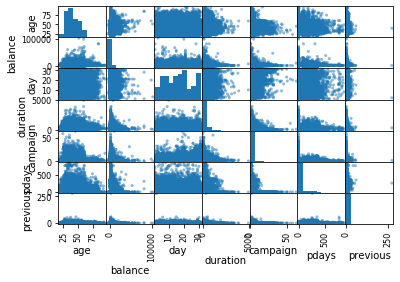

In [9]:
pd.plotting.scatter_matrix(df);

In [10]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


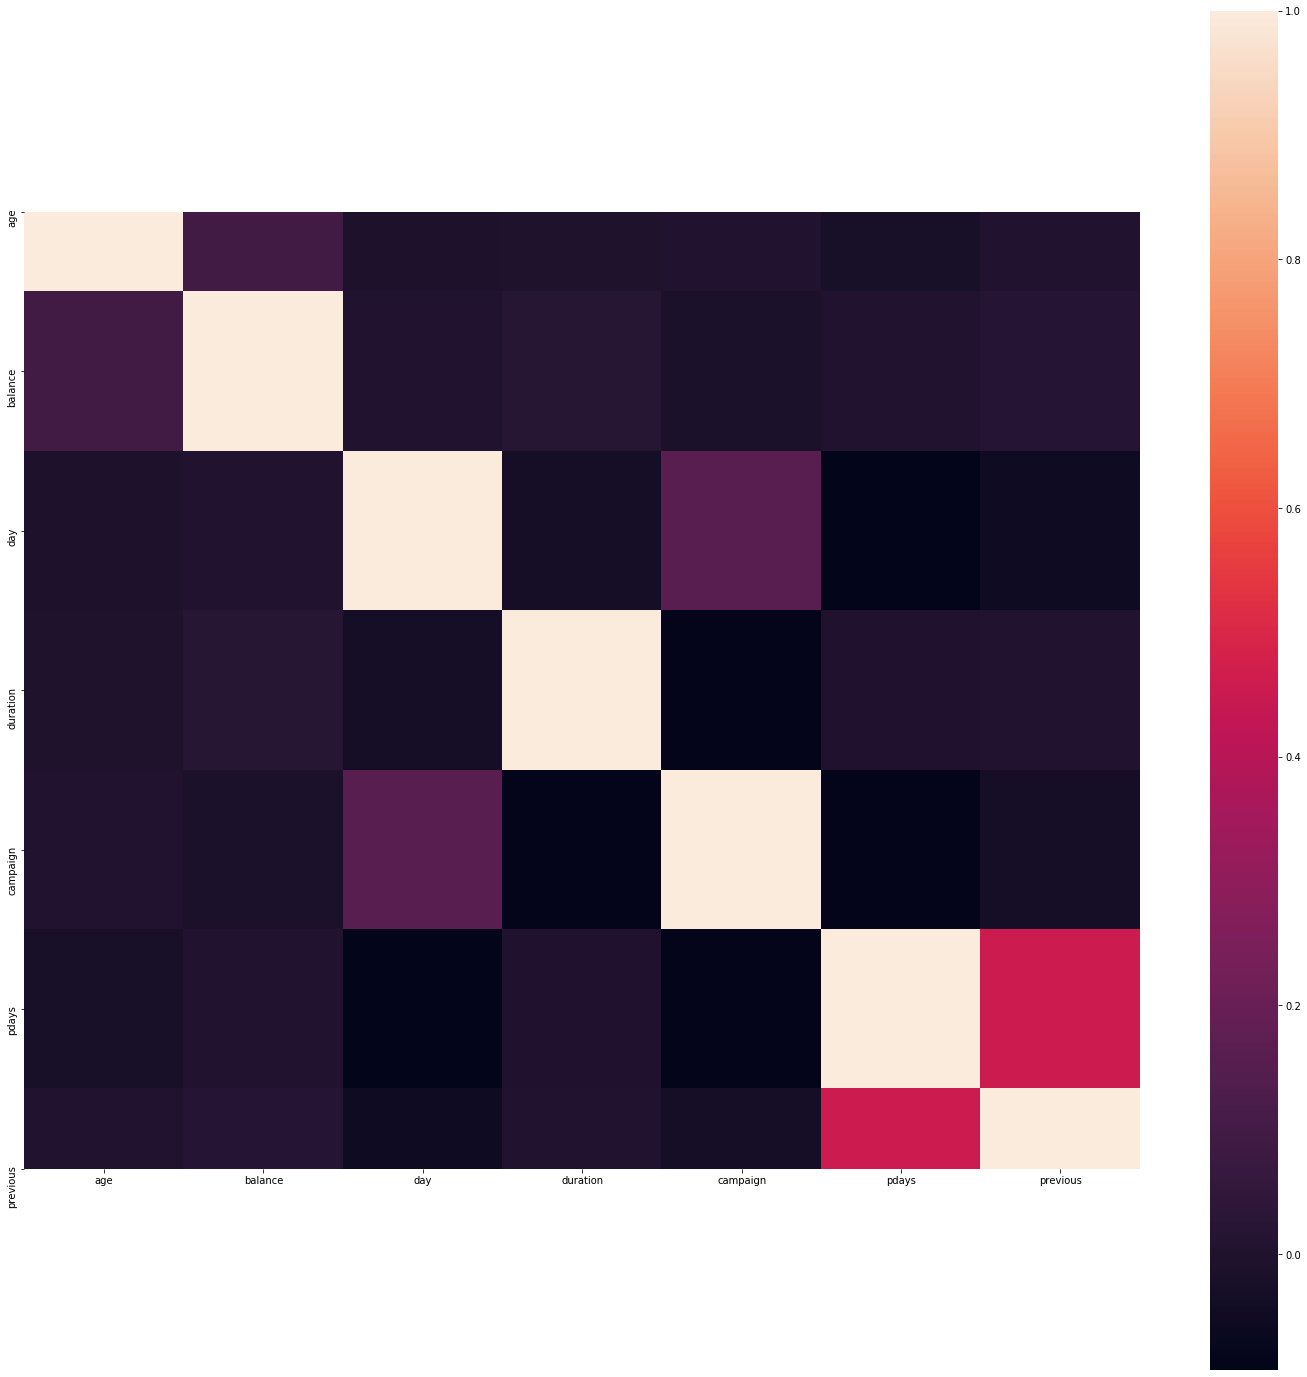

In [11]:
corrmap = df.corr()
plt.figure(figsize = (25,25))
sns.heatmap(corrmap, square = True)

In [12]:
iCat_cols = np.where(df.dtypes =='object')[0]

In [13]:
cat_cols=df.columns[iCat_cols]

In [14]:
_=[print(i,':\n',df[i].value_counts(),'\n--------------------------') for i in cat_cols]

job :
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 
--------------------------
marital :
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 
--------------------------
education :
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 
--------------------------
default :
 no     44396
yes      815
Name: default, dtype: int64 
--------------------------
housing :
 yes    25130
no     20081
Name: housing, dtype: int64 
--------------------------
loan :
 no     37967
yes     7244
Name: loan, dtype: int64 
--------------------------
contact :
 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 
--------------------------
month :
 may

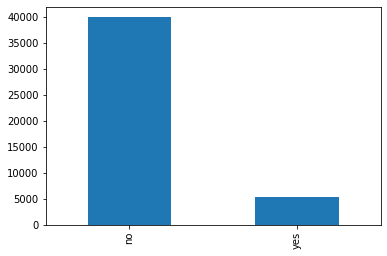

In [15]:
df['y'].value_counts().plot.bar()


This is an imbalanced data cause most of the result in the dependent variable y are 'no'



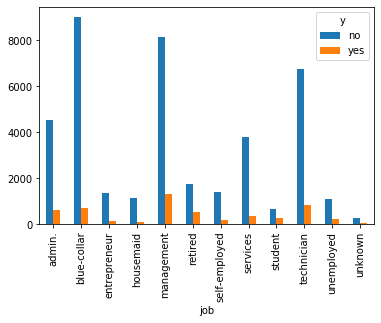

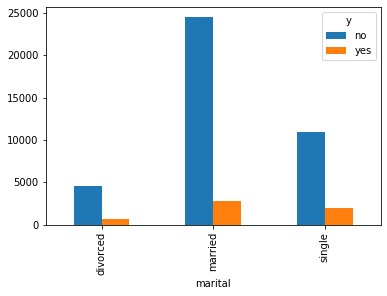

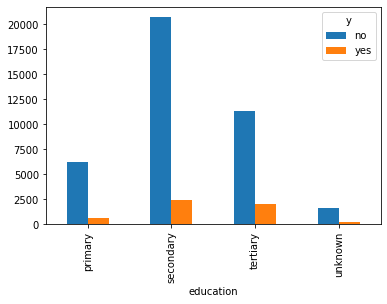

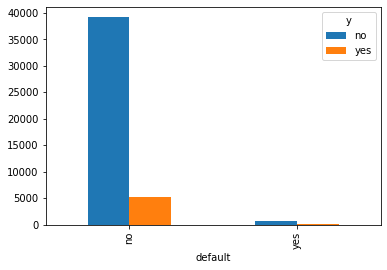

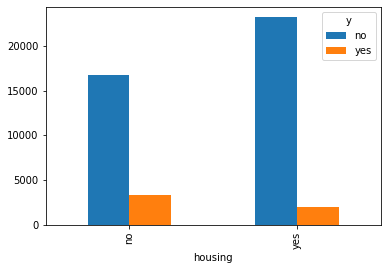

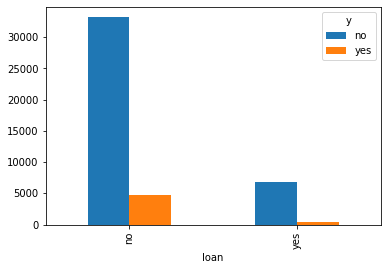

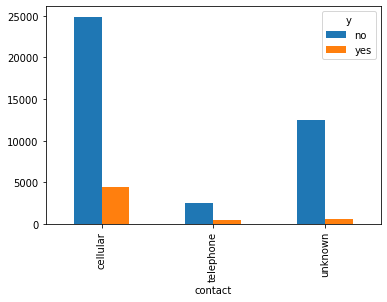

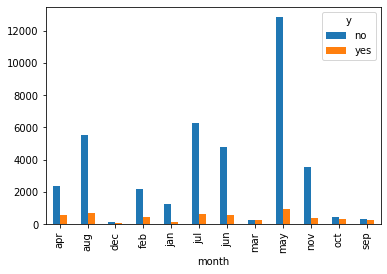

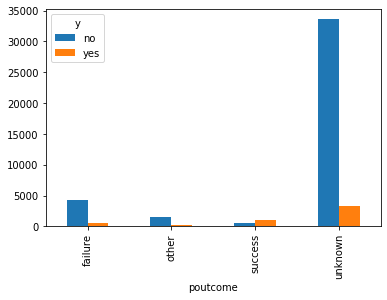

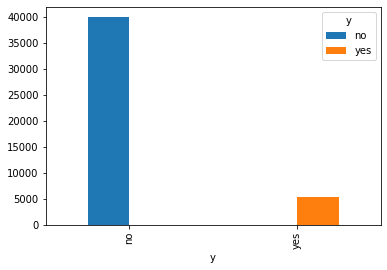

In [16]:
for col in cat_cols:
    pd.crosstab(df[col],df['y']).plot(kind='bar')

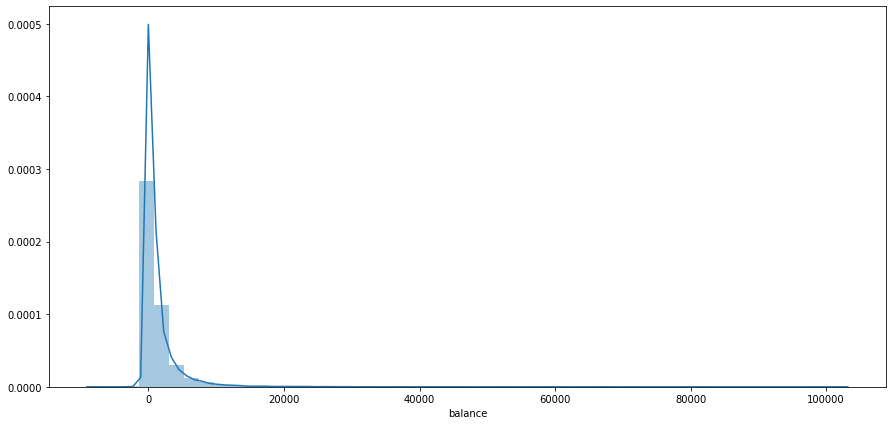

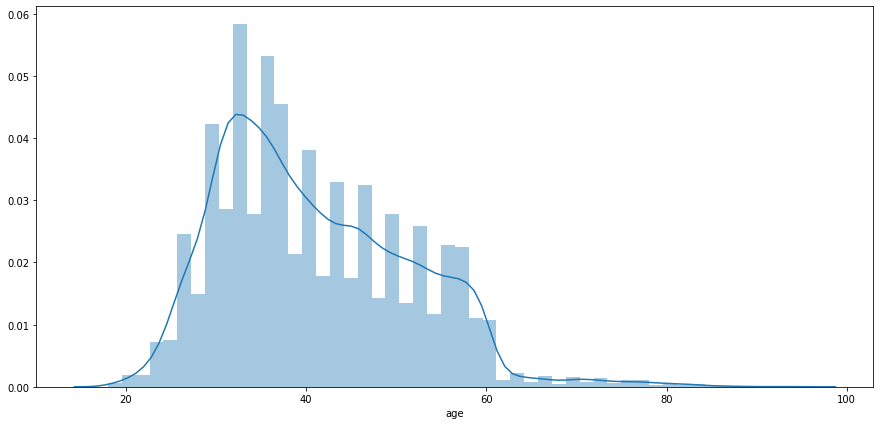

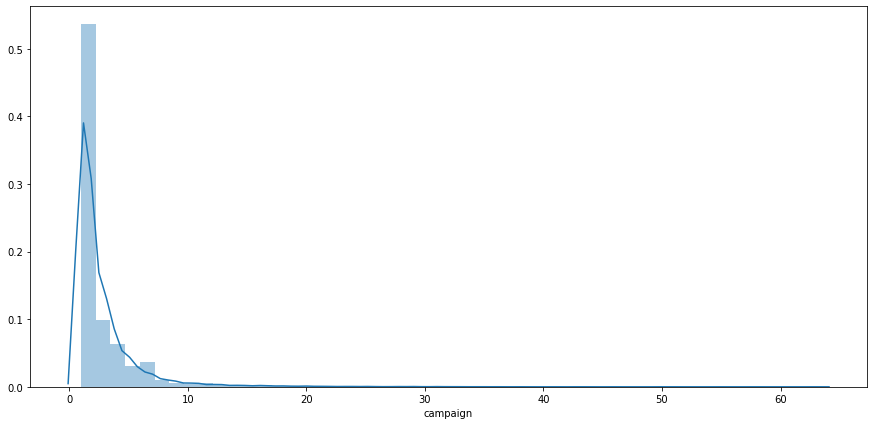

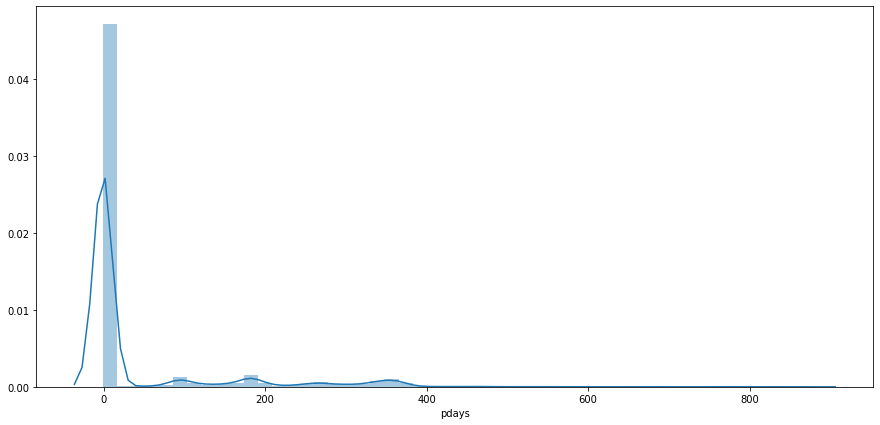

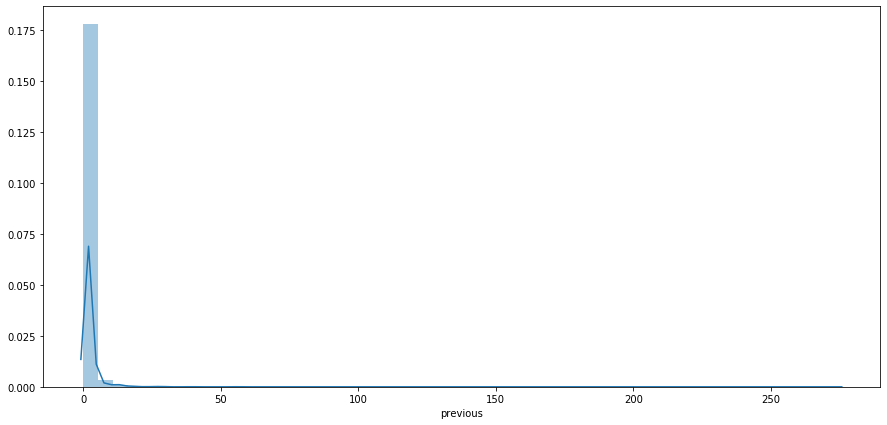

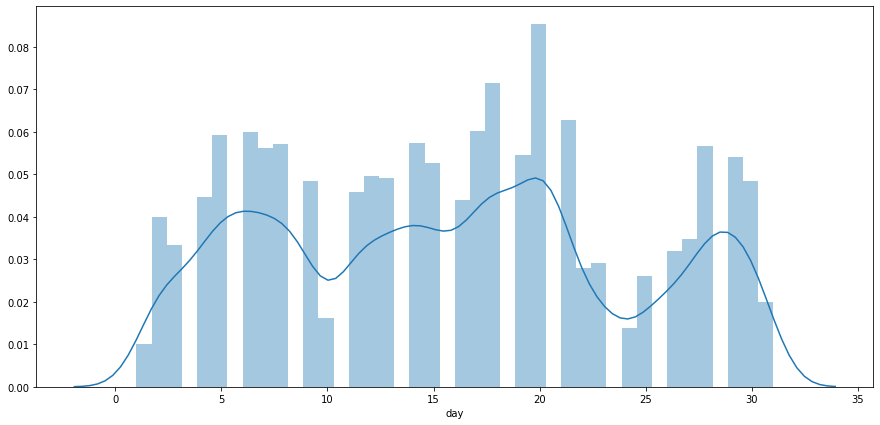

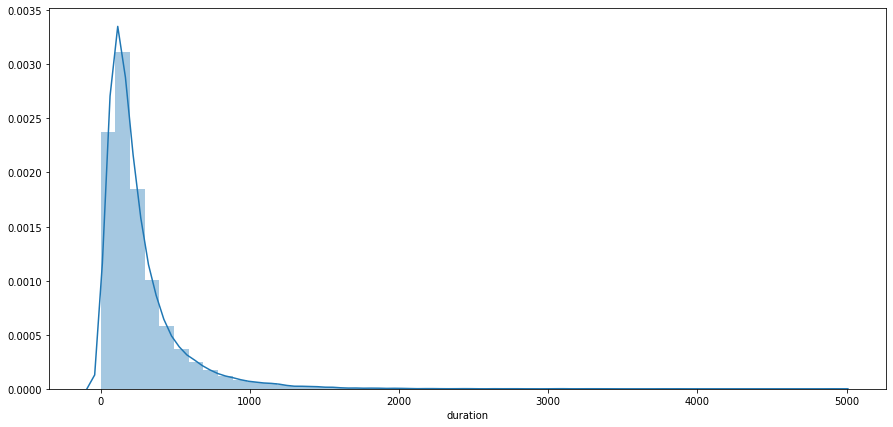

In [17]:

for col in set(all_cols)-set(cat_cols):
    plt.figure(figsize=(15,7))
    sns.distplot(a=df[col])

# Data cleaning/creating/removing/preprocessing, etc.

In [18]:
df['pdays'].value_counts().sort_values(ascending=False)

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 437        1
 54         1
 470        1
 854        1
 32         1
Name: pdays, Length: 559, dtype: int64

count of the value '-1' id far greater than others

In [19]:
data_df=df.copy()

In [20]:
#making new feature (Previously contacted or not) (from 'pdays')
data_df['prev_contacted']=df['pdays'].apply(lambda x: 0 if x==-1 else 1)

In [21]:
# Encoding:
data_df['y']=df['y'].apply(lambda x: 0 if x=='no' else 1)
data_df['default']=df['default'].apply(lambda x: 0 if x=='no' else 1)
data_df['housing']=df['housing'].apply(lambda x: 0 if x=='no' else 1)
data_df['loan']=df['loan'].apply(lambda x: 0 if x=='no' else 1)

In [22]:
# #impute missing values:

# data_df['contact'].fillna(data_df['contact'].median(), inplace = True)
# data_df['education'].fillna(data_df['education'].median(), inplace = True)

In [23]:
# we are not doing the missing value imputation since
# these are categorical values and imbalanced dataset and can't generate from other features

#Instead of imputation and removing, we treating the missing values as new values and
# doing one-hot encoding for the same

In [24]:
# Removing constant features (std==0 for numeric value column)
data_df.drop(data_df.std()[data_df.std()==0].index.values,axis=1,inplace=True)

In [25]:
# Removing constant features (unique value==1 for categorical value column)
def drop_constants(dff):
    columns=dff.columns.values
    for col in columns:
        if dff[col].nunique(dropna=False)==1:
            del dff[col]
    return dff

In [26]:
data_df=drop_constants(data_df)

In [27]:
#Removing known non-useful features
deleted_cols=['housing','poutcome']
data_df=data_df.drop(deleted_cols,axis=1)

In [28]:
onehot_cols=(set(cat_cols)-{'y','default','loan'})-set(deleted_cols)

In [29]:
data_df=pd.get_dummies(data_df,columns=onehot_cols,drop_first=True)

In [30]:
train_cols=list(data_df.columns)

In [31]:
train_cols.remove('y')

In [32]:
sc=StandardScaler()
X=sc.fit_transform(data_df[train_cols])
y=data_df['y']

In [33]:
# Balancing the imbalanced dataset:
sm=SMOTE(random_state=42)
X1,y1=sm.fit_resample(X,y)

In [53]:
x_train,x_test, y_train,y_test = train_test_split(X1,y1,random_state = 42,test_size=0.20)

# Training:

In [54]:
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier#,VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [55]:
result_cols = ["Classifier", "Accuracy"]
result_cols1 = ["Classifier","Precision", "Recall", 'F-measure']

result_frame = pd.DataFrame(columns=result_cols)
result_frame1 = pd.DataFrame(columns=result_cols1)

classifiers = [
        XGBClassifier(
                learning_rate= 0.1,
                colsample_bylevel= 0.4,
                colsample_bytree= 0.6,
                gamma= 0.5,
                max_depth=15,
                min_child_weight= 0.5,
                reg_lambda= 10.0,
                n_estimators=1000,
                subsample=0.9,
                silent=False,
                objective='binary:logistic',
                nthread=8,
                scale_pos_weight=1,
                seed=42),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.6500000000000001,min_samples_leaf=1, min_samples_split=5, n_estimators=100),
        KNeighborsClassifier(3),
        DecisionTreeClassifier(),
        SGDClassifier(),
        LogisticRegression(multi_class='multinomial',solver ='newton-cg'),
        SVC(),
        GaussianNB()
]


XGBClassifier accuracy = 94.68344918279166%
precision: 0.946848889761833 
recall: 0.9468344918279166


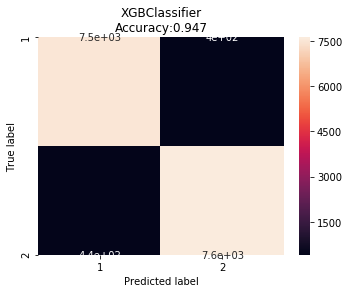

/home/safvan/.pyenv/versions/3.6.6/envs/bank_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier accuracy = 93.53747886530152%
precision: 0.9355728787128719 
recall: 0.9353747886530153


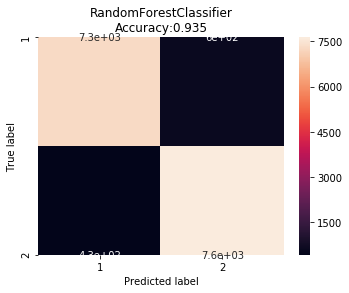

AdaBoostClassifier accuracy = 87.49452063372784%
precision: 0.8749576633668479 
recall: 0.8749452063372785


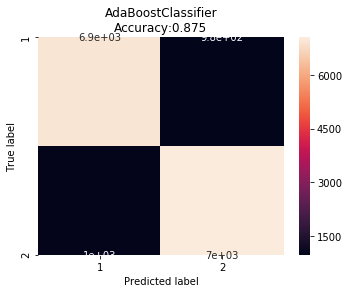

ExtraTreesClassifier accuracy = 94.34529400713883%
precision: 0.9456178362010182 
recall: 0.9434529400713884


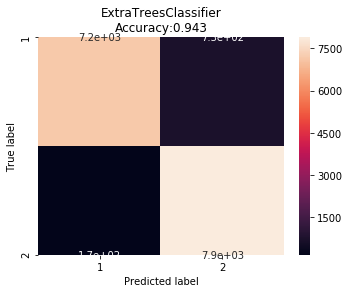

KNeighborsClassifier accuracy = 92.44786774375352%
precision: 0.93207502787333 
recall: 0.9244786774375352


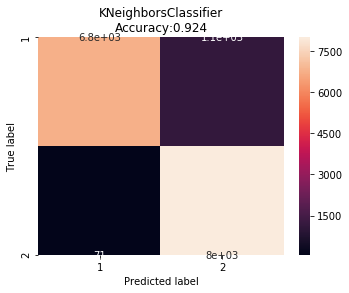

DecisionTreeClassifier accuracy = 89.79272340159058%
precision: 0.8979436383936543 
recall: 0.8979272340159058


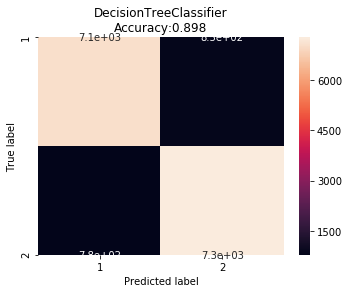

SGDClassifier accuracy = 82.54743565658464%
precision: 0.8277471089131554 
recall: 0.8254743565658463


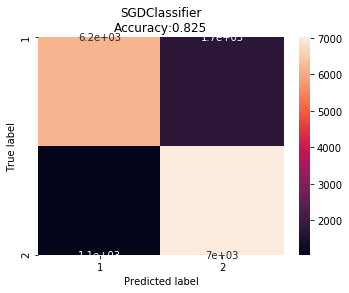

LogisticRegression accuracy = 82.9106393637673%
precision: 0.8291350876851283 
recall: 0.829106393637673


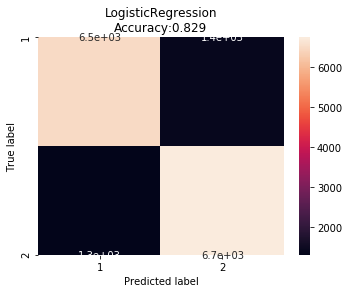

/home/safvan/.pyenv/versions/3.6.6/envs/bank_env/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC accuracy = 88.80330640616194%
precision: 0.8914473069342908 
recall: 0.8880330640616194


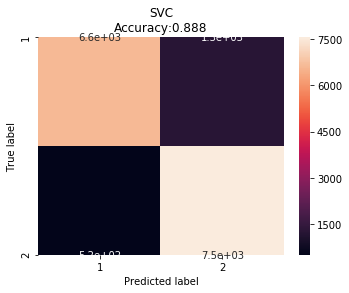

GaussianNB accuracy = 68.6079278602292%
precision: 0.7166060940950997 
recall: 0.6860792786022919


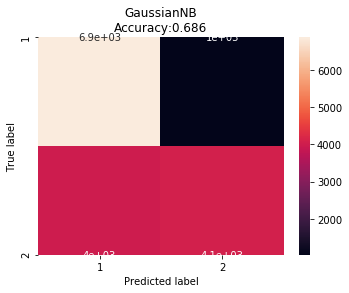

In [56]:
type1_error = []
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(x_train, y_train)
    predicted = clf.predict(x_test)
    acc = accuracy_score(y_test,predicted)
    precision = precision_score(y_test, predicted, average='weighted')
    rec = recall_score(y_test, predicted, average='weighted')
    f_measure = f1_score(y_test, predicted, average='weighted')
    type1_error.append([precision, rec, f_measure])

    print (name+' accuracy = '+str(acc*100)+'%\nprecision:',precision,'\nrecall:',rec)
    acc_field = pd.DataFrame([[name, acc*100]], columns=result_cols)
    result_frame = result_frame.append(acc_field)
    
    acc_field1 = pd.DataFrame([[name, precision, rec, f_measure]], columns=result_cols1)
    result_frame1 = result_frame1.append(acc_field1)
    confusion_mc = confusion_matrix(y_test, predicted)
    df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(1,3)], columns = [i for i in range(1,3)])
    plt.figure(figsize=(5.5,4))
    sns.heatmap(df_cm, annot=True)
    plt.title(name+'\nAccuracy:{0:.3f}'.format(acc))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

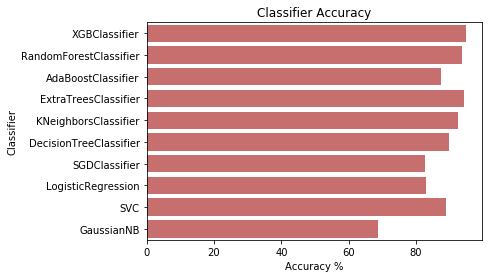

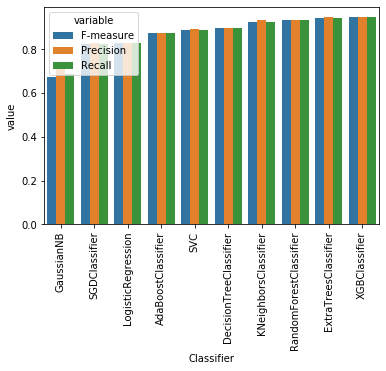

In [57]:
plt.figure()
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=result_frame, color="r")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

df1 = pd.melt(result_frame1, id_vars=['Classifier']).sort_values(['variable','value'])

plt.figure()
sns.barplot(x="Classifier", y="value", hue="variable", data=df1)
plt.xticks(rotation=90)
plt.show()

# Parameter tuning:

In [40]:
param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100,1000]}

In [41]:
clf=classifiers[0]

In [42]:
rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=2,
                            scoring='neg_log_loss', refit=False, random_state=42)

In [58]:
rs_clf.fit(x_train, y_train)

In [44]:
best_score = rs_clf.best_score_
best_params = rs_clf.best_params_

In [48]:
for param_name in sorted(best_params.keys()):
    print('%s= %r,' % (param_name, best_params[param_name]))

colsample_bylevel= 0.8,
colsample_bytree= 0.5,
gamma= 1.0,
learning_rate= 0.2,
max_depth= 15,
min_child_weight= 0.5,
n_estimators= 1000,
reg_lambda= 100.0,
silent= False,
subsample= 1.0,
